In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
# В этой статье будет рассмотрено, как рассчитывать доходность, 
# волатильность и построить один из основных индикаторов
aflt = yf.download('AFLT.ME','2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Доходность
# Данная величина представляет собой процентное изменение стоимости акции за один торговый день. Оно не учитывает дивиденды и комиссии. 
# Его легко рассчитать используя функцию pct_change () из пакета Pandas.
# Как правило используют лог доходность, так как она позволяет лучше понять и исследовать изменения с течением времени.

# Скорректированая цена закрытия
daily_close = aflt[['Adj Close']]

# Дневная доходность
daily_pct_change = daily_close.pct_change()

# Заменить NA значения на 0
daily_pct_change.fillna(0, inplace=True)

print(daily_pct_change.head())

# Дневная лог доходность
daily_log_returns = np.log(daily_close.pct_change()+1)

print(daily_log_returns.head())

Adj Close
Date                 
2020-01-03   0.000000
2020-01-06   0.001742
2020-01-08  -0.006182
2020-01-09   0.015747
2020-01-10   0.005167
            Adj Close
Date                 
2020-01-03        NaN
2020-01-06   0.001740
2020-01-08  -0.006202
2020-01-09   0.015624
2020-01-10   0.005154


In [8]:
# Чтобы из полученных данных узнать недельную и/или месячную доходность, используют функцию resample().
# Взять у `aflt` значения за последний рабочий день месяца
monthly = aflt.resample('BM').apply(lambda x: x[-1])

# Месячная доходность
print(monthly.pct_change().tail())

# Пересчитать `aflt` по кварталам и взять среднее значение за квартал
quarter = aflt.resample("4M").mean()

# Квартальную доходность
print(quarter.pct_change().tail())

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-02-28 -0.100074 -0.097243 -0.158259 -0.134637  -0.134637  5.143415
2020-03-31 -0.323776 -0.295459 -0.267037 -0.264257  -0.264257 -0.059454
2020-04-30  0.162932  0.125145  0.126893  0.107926   0.107926 -0.519443
2020-05-29  0.029948  0.021577  0.033056  0.030359   0.030359  0.065564
2020-06-30  0.075095  0.101333  0.101717  0.109403   0.109403  0.769297
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-01-31       NaN       NaN       NaN       NaN        NaN       NaN
2020-05-31 -0.232254 -0.226031 -0.241553 -0.234612  -0.234612  1.350268
2020-09-30 -0.018388 -0.002561 -0.000103  0.009973   0.009973  0.535986


In [4]:
print(daily_pct_change.head())


Adj Close
Date                 
2020-01-03   0.000000
2020-01-06   0.001742
2020-01-08  -0.006182
2020-01-09   0.015747
2020-01-10   0.005167


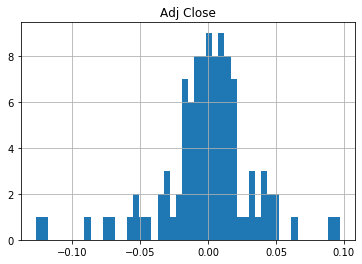

Adj Close
count  104.000000
mean    -0.001113
std      0.034011
min     -0.126825
25%     -0.014391
50%      0.000871
75%      0.015446
max      0.097236


In [15]:
# Диаграмма `daily_pct_c` bins это количество столбиков контейнеров с данными для прорисовки
daily_pct_change.hist(bins=50)

plt.show()

# Общая статистика
print(daily_pct_change.describe())

In [5]:
# Кумулятивная доходность
# Кумулятивная дневная прибыль полезна для определения стоимости инвестиций через определенные промежуток времени.
# Ее можно рассчитать, как приводиться в коде ниже.
cum_daily_return = (1 + daily_pct_change).cumprod()

print(cum_daily_return.tail())

Adj Close
Date                 
2020-06-04   0.831817
2020-06-05   0.868976
2020-06-08   0.926069
2020-06-09   0.894136
2020-06-10   0.863944


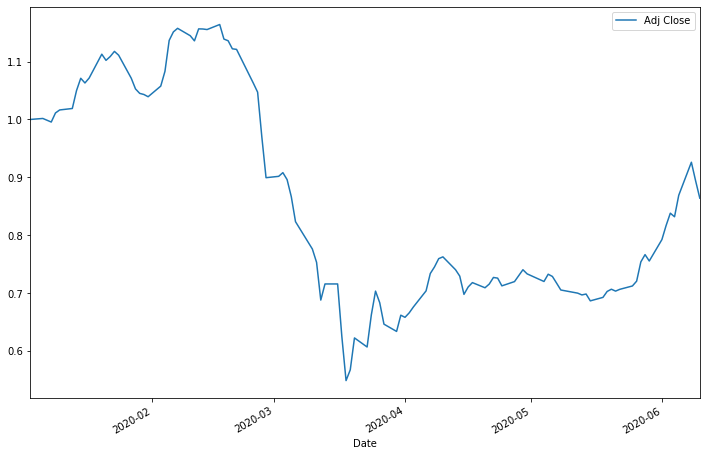

In [6]:
# Построение куммулютивной дневной доходности
cum_daily_return.plot(figsize=(12,8))

plt.show()

In [7]:
# Месячная куммулютивная доходность
cum_monthly_return = cum_daily_return.resample("M").mean()

print(cum_monthly_return.tail())

Adj Close
Date                 
2020-02-29   1.105100
2020-03-31   0.714479
2020-04-30   0.718766
2020-05-31   0.716032
2020-06-30   0.854001


[*********************100%***********************]  15 of 15 completed

1 Failed download:
- FIVEDR.ME: No data found, symbol may be delisted


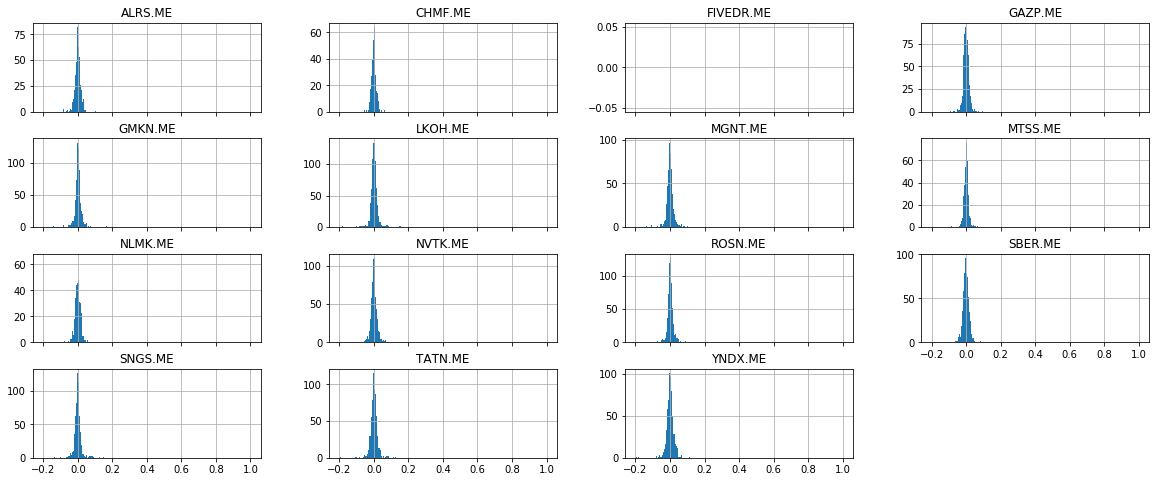

In [8]:
# Знание того, как рассчитать доходность, является ценным при анализе акции.
#  Но еще большую ценность оно представляет при сравнении с другими акциями.
# Возьмем некоторые акции (выбор их совершенно случайный) и построим их диаграмму.
# Сбербанк	ЛУКОЙЛ	ГАЗПРОМ ао	ГМКНорНик	Новатэк ао
# Роснефть	Яндекс	Татнфт ао	Сургнфгз	МТС-ао
# X5 Retail Group-гдр	Магнит ао	НЛМК ао	СевСт-ао	АЛРОСА ао
ticker = ['SBER.ME','LKOH.ME','YNDX.ME','ALRS.ME','CHMF.ME',
          'NLMK.ME','MGNT.ME','FIVEDR.ME','MTSS.ME','SNGS.ME',
          'TATN.ME','ROSN.ME','NVTK.ME','GMKN.ME','GAZP.ME']

stock = yf.download(ticker,'2020-01-01')
print(stock)
# # Дневная доходность в `daily_close_px`
# daily_pct_change = stock['Adj Close'].pct_change()

# # Распределение
# daily_pct_change.hist(bins=50, sharex=True, figsize=(20,8))

# plt.show()

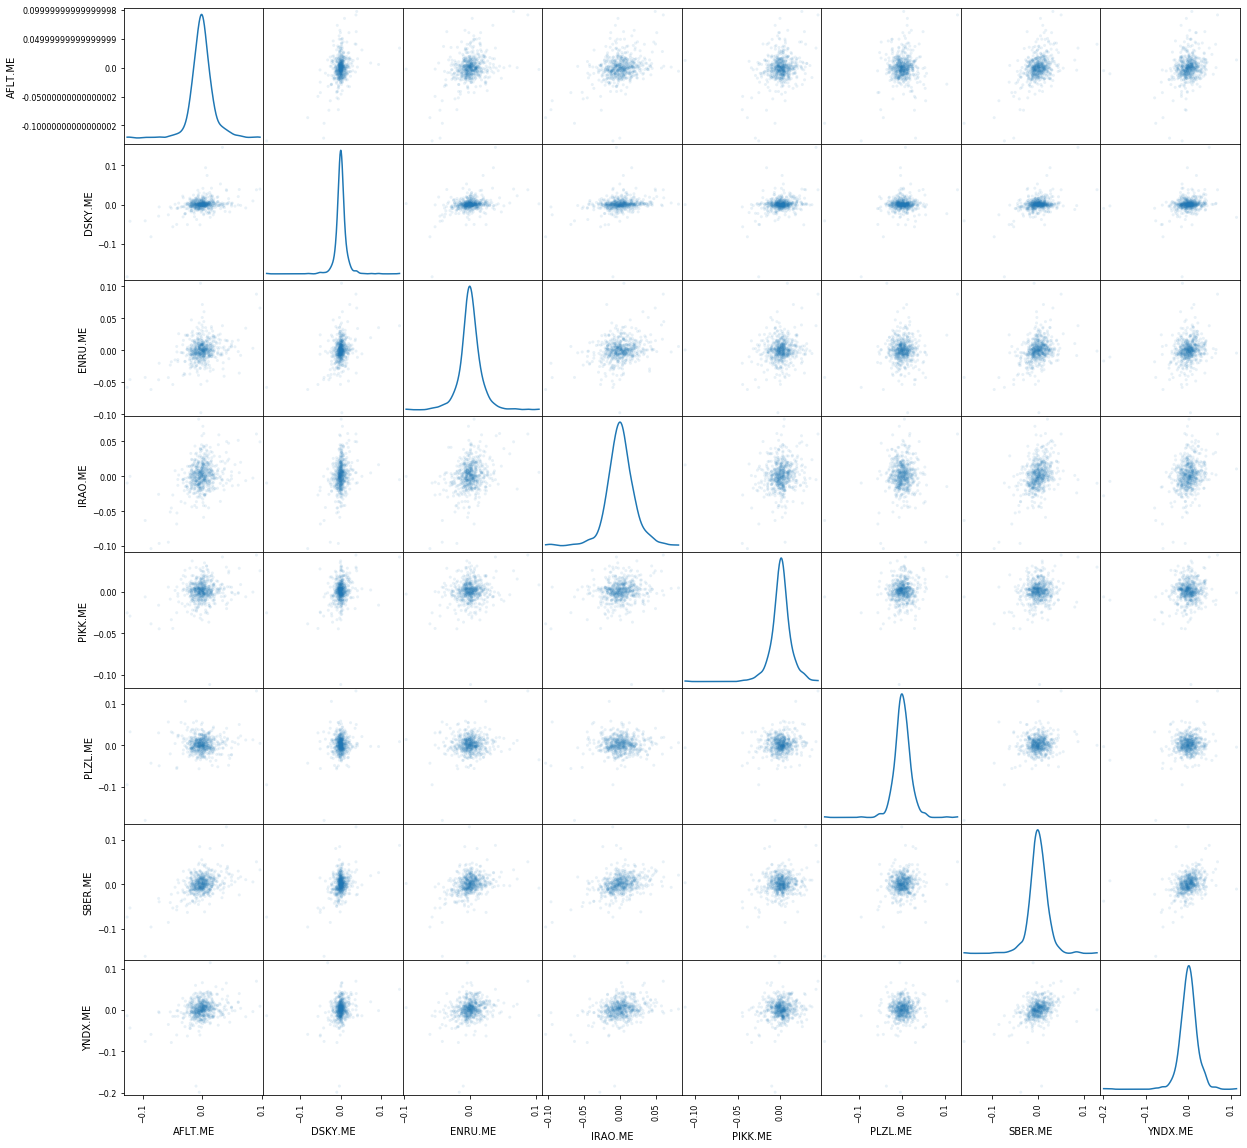

In [23]:
# Еще один полезный график —матрица рассеяния. Ее можно легко построить при помощи функции scatter_matrix (), входящей в библиотеку pandas. В качестве аргументов используется daily_pct_change и устанавливается параметр Ядерной оценки плотности — Kernel Density Estimation. Кроме того, можно установить прозрачность с помощью параметра alpha и размер графика с помощью параметра figsize.

from pandas.plotting import scatter_matrix

# Матрица рассеивания `daily_pct_change`  
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(20,20))

plt.show()